# Gradient descent for least squares vs Huber loss

You are training a least squares linear regression on some data, but your model is not doing very well - and you notice that for most data points, the model predicts a value that is just slightly too large.

After some exploratory data analysis, you realize that the data includes a small number of outliers with unusually large values. Because the least squares loss function is very sensitive to outliers, the entire regression line is shifted up to reduce the loss associated with those few outliers.

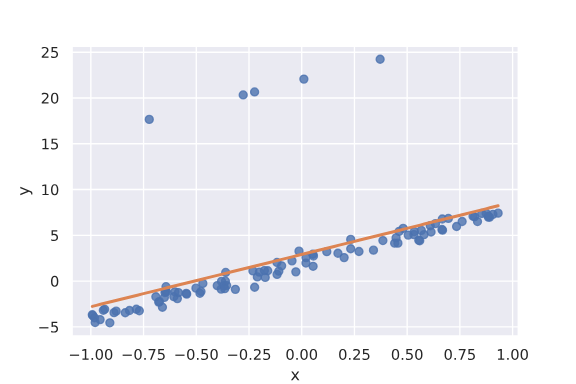

You don't really need your model to make good predictions on the outliers (it's not doing that well, anyway), but you also don't want to remove them from your training data - you don't have any good systematic criteria for what's considered an "outlier", it will make your model training pipeline more fragile, and you don't think it's a good idea. Instead, you want to _keep_ the outliers in the data, but train your model using a loss function that is less sensitive to a small number of outliers.

Luckily, you know about the Huber loss function, which is designed especially for this purpose. The Huber loss for a sample _i_ is defined as follows:

$$
L_i(w)=h\left(y_i-\left\langle w, x_i\right\rangle\right)
$$
where for some $\delta$ > 0,
$$
h(z) \equiv \begin{cases}\frac{1}{2} z^2 & \text { if }|z| \leq \delta \\ \delta|z|-\frac{\delta^2}{2} & \text { if }|z|>\delta\end{cases}
$$

For residuals up to a certain magnitude (specified by a parameter $\delta$), the Huber loss is the same as the regular L2 loss. For residuals with larger magnitude, the Huber loss uses L1 loss (absolute value of the residual), so it will not overcompensate for a few outliers.

You don't have a closed form expression for the optimal parameters that solve the Huber loss function, but it is differentiable, so you can solve a linear regression with Huber loss using gradient descent. Using the chain rule, the gradient of the Huber loss is:
$$

\frac{\partial L_i}{\partial w}=-x_i h^{\prime}\left(y_i-\left\langle w, x_i\right\rangle\right) \\
$$
where
$$
h^{\prime}(z) \equiv \begin{cases}z & \text { if }|z| \leq \delta \\
\delta \operatorname{sign}(z) & \text { if }|z|>\delta\end{cases}

$$
and then given a set of _n_ samples, you can apply the gradient descent update rule
$$
w^{t+1}=w^t-\frac{\alpha}{n} \sum_{i=1}^n \nabla L_i\left(w^t\right)
$$

In the attached workspace, you will implement the gradient descent step for Huber loss, then compare a least squares linear regression to a Huber linear regression for some synthetic data with known "true" coefficients, and some outliers.

| Name | Type |	Description |
| --- | --- | --- |
**gd_step_hub** | function | Implements one step of gradient descent for linear regression with Huber loss. Returns a numpy array with the next parameter vector.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

The function below implements one gradient descent step for the **L2 loss function** (least squares loss), which you can copy and use as a starting point, and also use as a point of comparison -

In [7]:
def gd_step_l2(w, X, y, lr):
    # use current parameters to get y_hat
    y_hat = np.dot(X,w)
    error = y_hat-y
    # compute gradient for this y_hat
    grad = np.matmul(X.T, error)
    # update weights
    w_new = w - (lr/X.shape[0])*grad
    return w_new

In the next cell, you will implement a function that executes one gradient descent step for the **Huber loss function**.

In [8]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
def gd_step_hub(w, X, y, lr, delta=1):
    # use current parameters to get y_hat
    y_hat = np.dot(X, w)
    error = y_hat-y
    # compute gradient for this y_hat
    mask = np.abs(error) <= delta
    grad = np.matmul(X.T, np.where(mask, error, delta * np.sign(error)))
    # Update weights
    w_new = w - (lr / X.shape[0]) * grad
    return w_new

To check your work, you can use the following data, which is generated from a "true" function with *known* coefficient values (for the "regular" data) and with a few outliers added. (But, note that the grader will evaluate your work using a different set of data.)

In [9]:
y = np.genfromtxt('data.csv',delimiter=',', usecols=(-1))
X = np.genfromtxt('data.csv',delimiter=',', usecols=(0, 1, 2))

The following cell will solve the linear regression with gradient descent in two ways: using the least squares loss, and using your Huber loss. 

Then, a visualization will show the true parameters, the parameters estimated by the least squares gradient descent, and the parameters estimated by your Huber gradient descent, on this data.  You should see that the linear regression with Huber loss is much more robust at "ignoring" the outliers.

Text(0.5, 1.0, "Huber loss\n ['2.0257', '5.0302', '3.9992']")

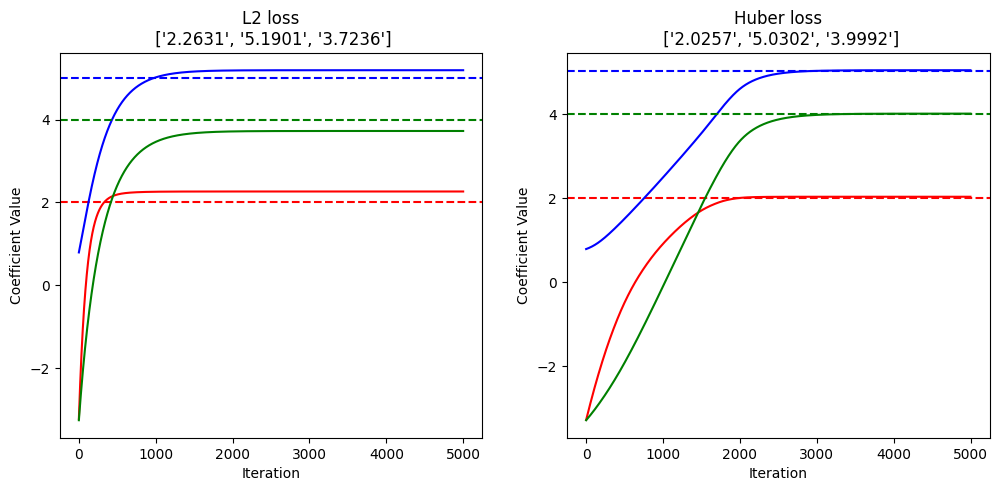

In [10]:
itr = 5000
lr = 0.01

colors = ["r", "b", "g"]

# these are known to us because we are using "fake" data!
w_true = [2, 5, 4]
# this is a random starting point
w_init = np.random.uniform(-5, 5, len(w_true))

w_steps_l2 = np.zeros((itr, len(w_init)))
w_steps_hub = np.zeros((itr, len(w_init)))

w_star_l2  = w_init
w_star_hub = w_init
for i in range(itr):
    w_star_l2  = gd_step_l2(w_star_l2, X, y, lr)
    w_star_hub = gd_step_hub(w_star_hub, X, y, lr, delta=1)
    w_steps_l2[i]  = w_star_l2
    w_steps_hub[i] = w_star_hub

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for n, w in enumerate(w_true):
    plt.axhline(y=w, linestyle='--', color=colors[n]);
    plt.plot(np.arange(itr), w_steps_l2[:,n], color=colors[n], label='w' + str(n))
plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("L2 loss\n %s" % ["{0:0.4f}".format(w) for w in w_star_l2])

plt.subplot(1, 2, 2)
for n, w in enumerate(w_true):
    plt.axhline(y=w, linestyle='--', color=colors[n]);
    plt.plot(np.arange(itr), w_steps_hub[:,n], color=colors[n], label='w' + str(n))
plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("Huber loss\n %s" % ["{0:0.4f}".format(w) for w in w_star_hub])
